## Памятка для понимания значений и интерпретации результатов

### **1. IC₅₀ (Half Maximal Inhibitory Concentration)**  
- **Определение:** Концентрация вещества, необходимая для **подавления** биологического процесса (например, репликации вируса, активности фермента) на **50%** по сравнению с контролем.  
- **Применение:**  
  - В противовирусных исследованиях — показывает, насколько эффективно вещество блокирует вирус.  
  - Чем **меньше IC₅₀**, тем выше эффективность соединения.  

### **2. CC₅₀ (Half Maximal Cytotoxic Concentration)**  
- **Определение:** Концентрация вещества, вызывающая **гибель 50% клеток** в эксперименте (токсичность).  
- **Применение:**  
  - Отражает **цитотоксичность** вещества для здоровых клеток.  
  - Чем **выше CC₅₀**, тем безопаснее соединение.  

### **3. SI (Selectivity Index — Индекс Селективности)**  
- **Формула:**  
  $ SI = \frac{CC_{50}}{IC_{50}}   $
- **Смысл:** Показывает, насколько вещество **избирательно** действует на мишень (например, вирус), а не на клетки хозяина.  
  - **SI > 10** — считается приемлемым для потенциальных лекарств.  
  - **SI > 100** — высокая селективность, минимальная токсичность.  

### **Пример интерпретации:**  
Если у препарата:  
- **IC₅₀ = 1 μM** (хорошо подавляет вирус),  
- **CC₅₀ = 100 μM** (низкая токсичность),  
то **SI = 100** — отличный кандидат для дальнейших исследований.  

Эти параметры критически важны при скрининге новых лекарств, особенно противовирусных (например, против ВИЧ, SARS-CoV-2).

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest


In [23]:
df = pd.read_excel('data/Данные_для_курсовои_Классическое_МО.xlsx')
# Удаляем нумерацию что бы она нам не мешалась
df.drop(['Unnamed: 0'], inplace = True, axis = 1)
# Проверка на наличие пропущенных значений
missing_df = pd.DataFrame({
    "Количество пропусков": df.isnull().sum(),
    "Доля пропусков (%)": (df.isnull().mean() * 100).round(2)
})

missing_df = missing_df[missing_df["Количество пропусков"] > 0]

print("Статистика пропусков:")
missing_df

Статистика пропусков:


,Количество пропусков,Доля пропусков (%)
MaxPartialCharge,3,0.3
MinPartialCharge,3,0.3
MaxAbsPartialCharge,3,0.3
MinAbsPartialCharge,3,0.3
BCUT2D_MWHI,3,0.3
BCUT2D_MWLOW,3,0.3
BCUT2D_CHGHI,3,0.3
BCUT2D_CHGLO,3,0.3
BCUT2D_LOGPHI,3,0.3
BCUT2D_LOGPLOW,3,0.3


In [3]:
df.fillna(0, inplace=True)
df

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,0,0,0
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,0,0,0
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,1,0,0,0,0,0,0,0,0,0
999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,522.635,...,0,0,0,0,0,0,0,0,0,0


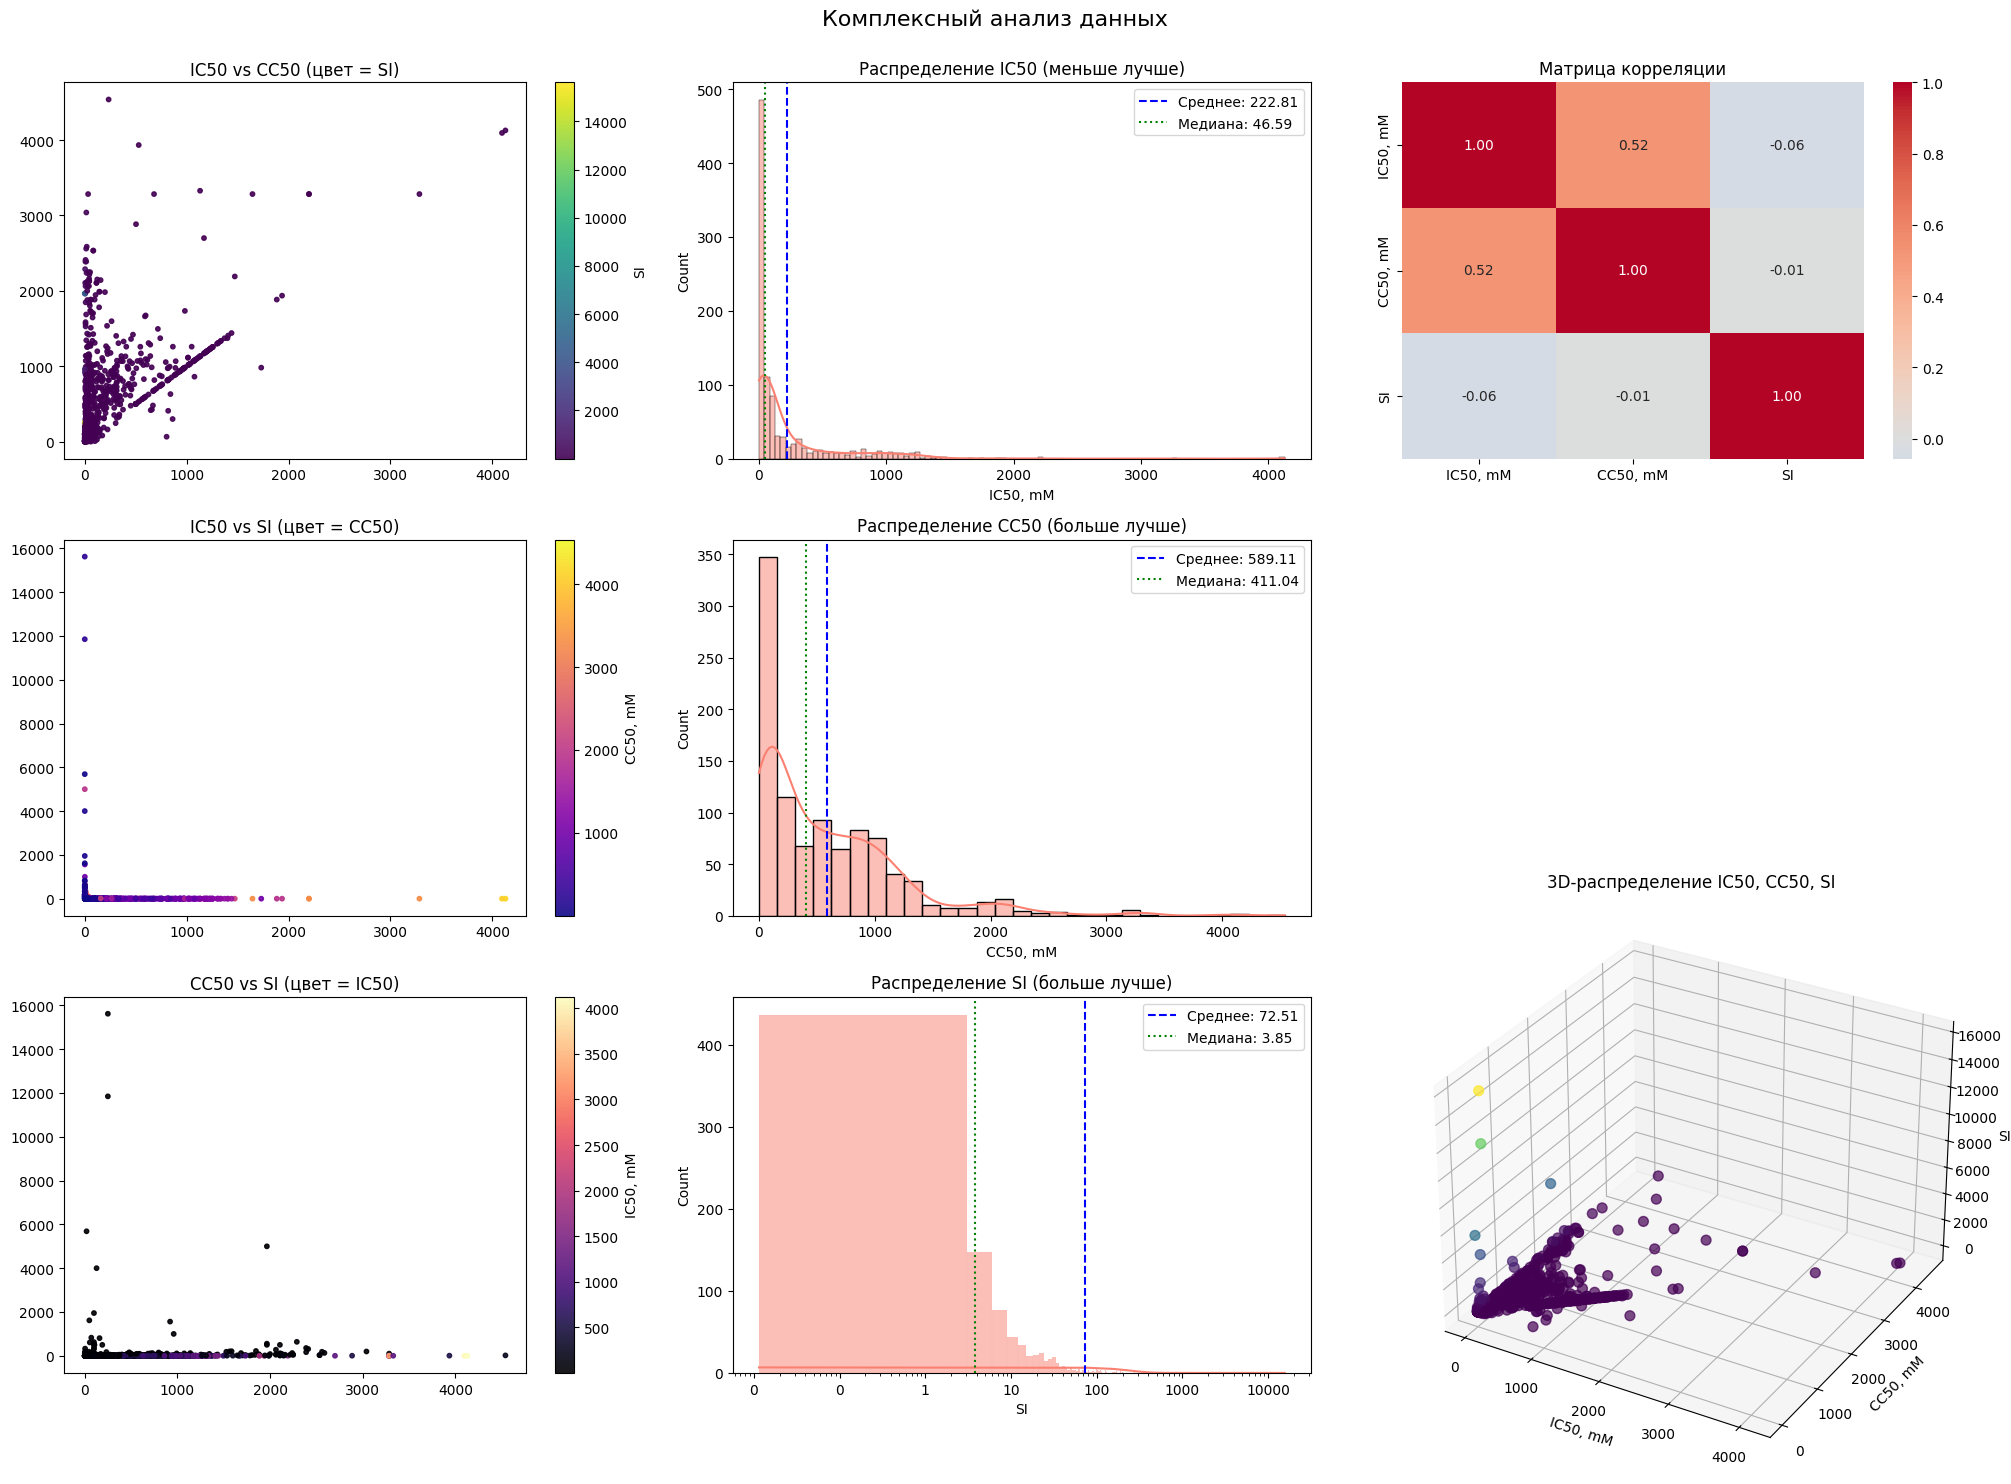

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

data = df[["IC50, mM", "CC50, mM", "SI"]]

fig = plt.figure(figsize=(20, 18))
gs = GridSpec(4, 3, figure=fig) 

# Функция для добавления линий среднего и медианы
def add_mean_median(ax, series, color):
    mean_val = series.mean()
    median_val = series.median()
    
    ax.axvline(mean_val, color='blue', linestyle='--', linewidth=1.5, 
               label=f'Среднее: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle=':', linewidth=1.5, 
               label=f'Медиана: {median_val:.2f}')
    ax.legend()

# Распределения ---
ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(data["IC50, mM"], kde=True, color="salmon", ax=ax2)
add_mean_median(ax2, data["IC50, mM"], "salmon")
ax2.set_title("Распределение IC50 (меньше лучше)")

ax3 = fig.add_subplot(gs[1, 1])
sns.histplot(data["CC50, mM"], kde=True, color="salmon", ax=ax3)
add_mean_median(ax3, data["CC50, mM"], "salmon")
ax3.set_title("Распределение CC50 (больше лучше)")

ax4 = fig.add_subplot(gs[2, 1])
sns.histplot(data["SI"], kde=True, color="salmon", ax=ax4)
add_mean_median(ax4, data["SI"], "salmon")
ax4.set_xscale("log")  
ax4.set_title("Распределение SI (больше лучше)")
ax4.xaxis.set_major_formatter(plt.ScalarFormatter())

# Парные зависимости ---
ax5 = fig.add_subplot(gs[0, 0])
scatter = ax5.scatter(
    x="IC50, mM", 
    y="CC50, mM", 
    c="SI", 
    data=data, 
    alpha=0.9, 
    cmap="viridis",
    s=10 
)
ax5.set_title("IC50 vs CC50 (цвет = SI)")
plt.colorbar(scatter, ax=ax5, label="SI") 

# Второй график с цветом по CC50
ax6 = fig.add_subplot(gs[1, 0])
scatter = ax6.scatter(
    x="IC50, mM", 
    y="SI", 
    c="CC50, mM", 
    data=data, 
    alpha=0.9, 
    cmap="plasma",
    s=10
)
ax6.set_title("IC50 vs SI (цвет = CC50)")
plt.colorbar(scatter, ax=ax6, label="CC50, mM")

# Третий график с цветом по IC50
ax7 = fig.add_subplot(gs[2, 0])
scatter = ax7.scatter(
    x="CC50, mM", 
    y="SI", 
    c="IC50, mM", 
    data=data, 
    alpha=0.9, 
    cmap="magma",
    s=10
)
ax7.set_title("CC50 vs SI (цвет = IC50)")
plt.colorbar(scatter, ax=ax7, label="IC50, mM")

# Матрица корреляции (верхний левый угол) ---
ax1 = fig.add_subplot(gs[0, 2])
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f", ax=ax1)
ax1.set_title("Матрица корреляции")

# 3D-график ---
ax8 = fig.add_subplot(gs[1:, 2], projection='3d')  # Объединяем 2 ячейки
scatter_3d = ax8.scatter(
    data["IC50, mM"], 
    data["CC50, mM"], 
    data["SI"],
    c=data["SI"],  
    cmap="viridis",
    alpha=0.7,
    s=50  
)
ax8.set_xlabel("IC50, mM")
ax8.set_ylabel("CC50, mM")
ax8.set_zlabel("SI")
ax8.set_title("3D-распределение IC50, CC50, SI")

# Настройка общего вида
plt.tight_layout()
plt.suptitle("Комплексный анализ данных", y=1.02, fontsize=16)
plt.show()

# Выводы:

Эффективность vs. Токсичность: Многие соединения эффективны (низкий IC50), но одновременно и токсичны (низкий CC50), что ограничивает их терапевтическую применимость.

Селективность (SI): Большинство соединений имеют низкий SI, что указывает на недостаточную селективность (малое окно между эффективной и токсической дозой). Это критично для разработки безопасных лекарств.

Потенциальные "хиты": Соединения с высоким SI (значительно больше 1) требуют дополнительного изучения, так как они могут быть перспективными кандидатами. Их можно выявить, отфильтровав данные по SI > 10 (если такие есть). И судя по графикам таких значений достаточно мало, что в целом не удивительно 


Анализ для целевой переменной: IC50, mM


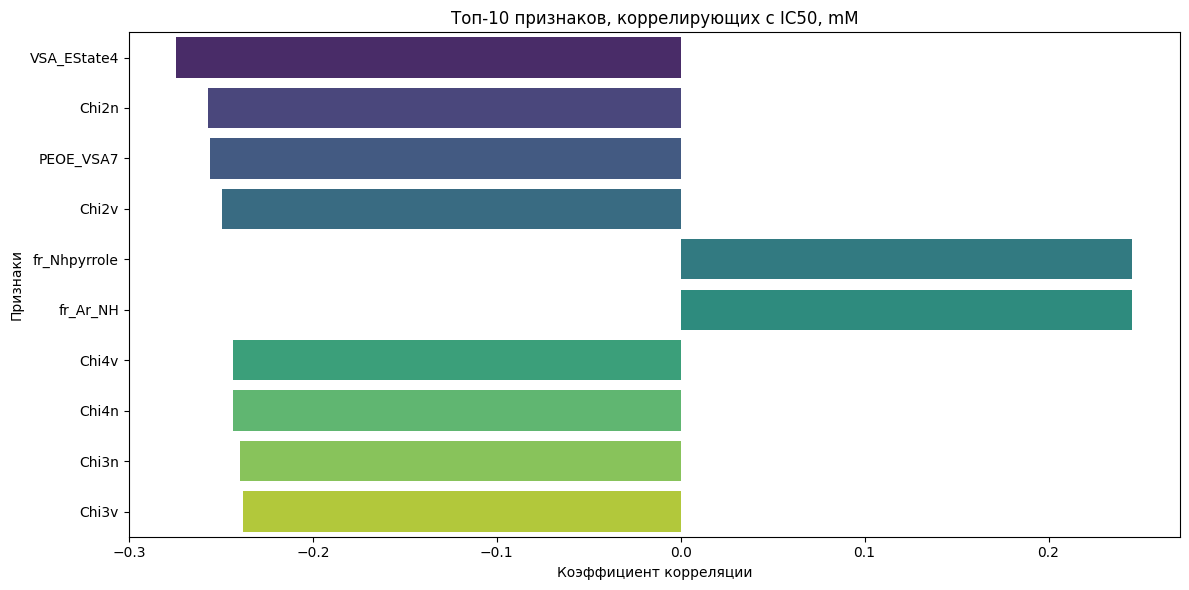


Анализ для целевой переменной: CC50, mM


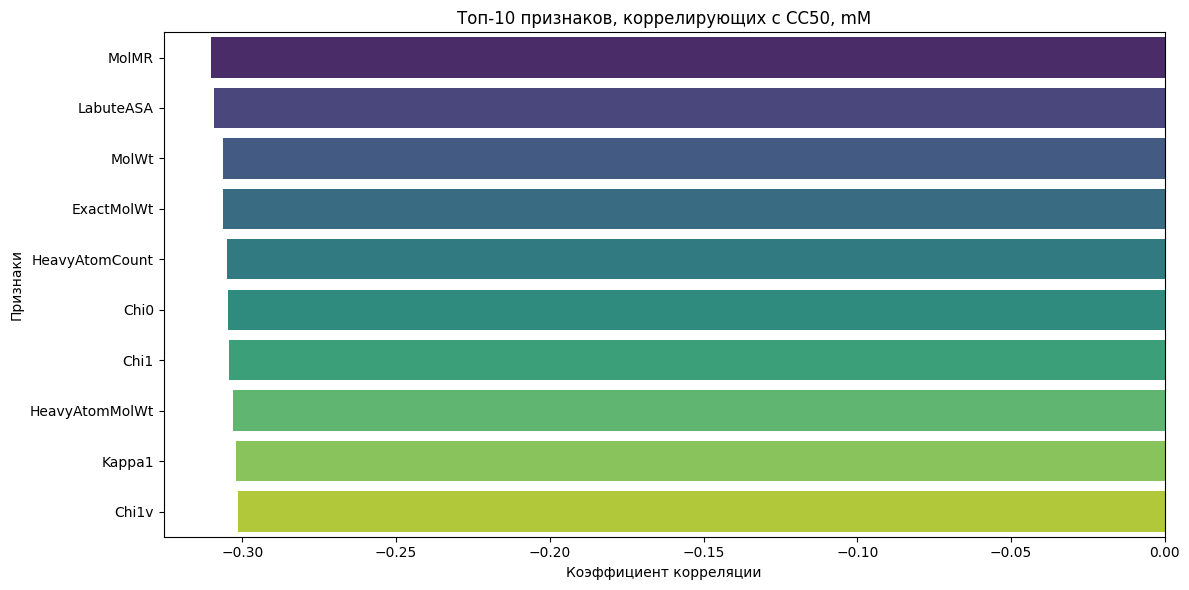


Анализ для целевой переменной: SI


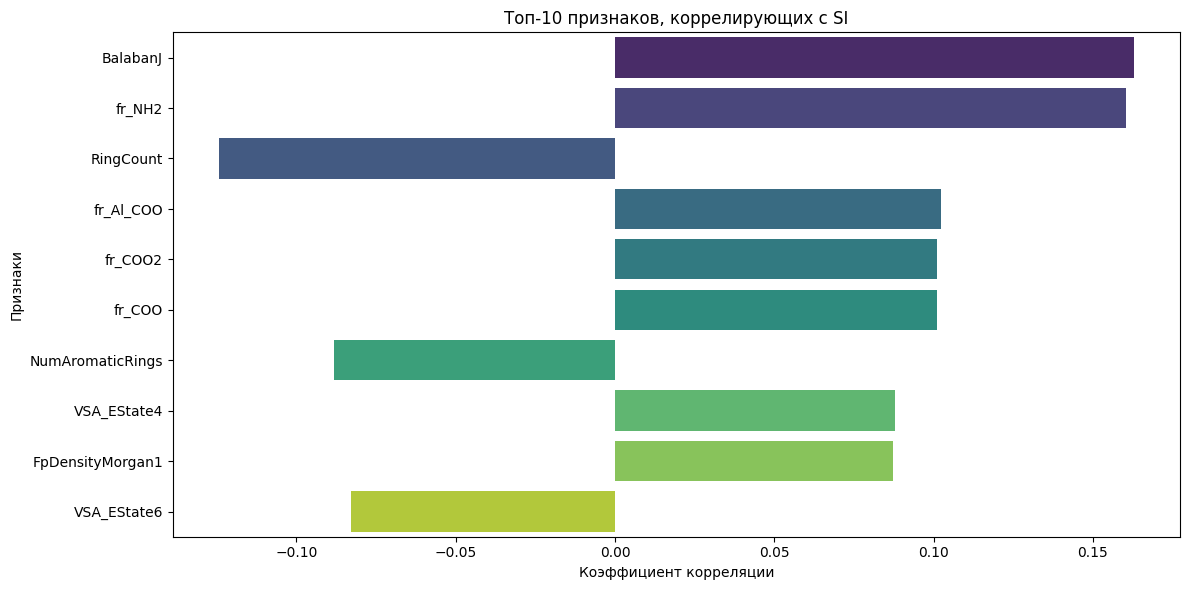

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_correlated_features(X, y_dict, n_top=10):
    """
    Параметры:
    X - DataFrame
    y_dict - словарь, где ключи - имена целевых переменных, значения - Series с целевыми переменными
    n_top - количество топовых признаков для отображения (по умолчанию 10)
    """

    X_analysis = X.copy()
    
    # Удаляем все целевые переменные из признаков, если они там есть
    for y_name in y_dict.keys():
        if y_name in X_analysis.columns:
            X_analysis = X_analysis.drop(columns=[y_name])
    
    for y_name, y in y_dict.items():
        print(f"\nАнализ для целевой переменной: {y_name}")
        
        df_corr = pd.concat([X_analysis, y], axis=1)
        corr = df_corr.corr(numeric_only=True)[y_name].drop(y_name, errors='ignore').sort_values(ascending=False)
        corr = corr.dropna()
        
        if len(corr) == 0:
            print(f"Не удалось вычислить корреляцию для {y_name} - возможно, все значения NaN")
            continue
            
        # Берем абсолютные значения корреляций для выбора самых сильных
        abs_corr = corr.abs().sort_values(ascending=False)
        
        # Выбираем топ-N признаков
        n_top_actual = min(n_top, len(abs_corr))
        top_features = abs_corr.head(n_top_actual).index.tolist()
        top_corr_values = corr[top_features]
        
        # print(f"Топ-{n_top_actual} коррелирующих признаков:")
        # print(top_corr_values)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=top_corr_values.values, y=top_features, hue=top_features, palette='viridis', legend=False)
        plt.title(f'Топ-{n_top_actual} признаков, коррелирующих с {y_name}')
        plt.xlabel('Коэффициент корреляции')
        plt.ylabel('Признаки')
        plt.tight_layout()
        plt.show()


X = df.drop(columns=["IC50, mM", "CC50, mM", "SI"])
y_dict = {
    "IC50, mM": df["IC50, mM"],
    "CC50, mM": df["CC50, mM"],
    "SI": df["SI"]
}
plot_top_correlated_features(X, y_dict)

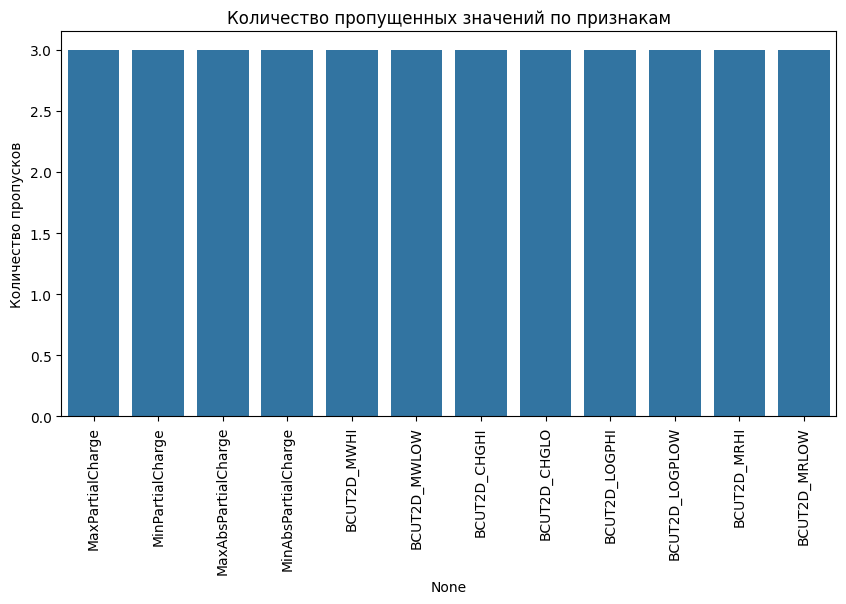

In [ ]:
# Проверка пропусков
missing = df.isnull().sum()
missing = missing[missing > 0]

# Столбчатая диаграмма пропусков
plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=90)
plt.title("Количество пропущенных значений по признакам")
plt.ylabel("Количество пропусков")
plt.show()

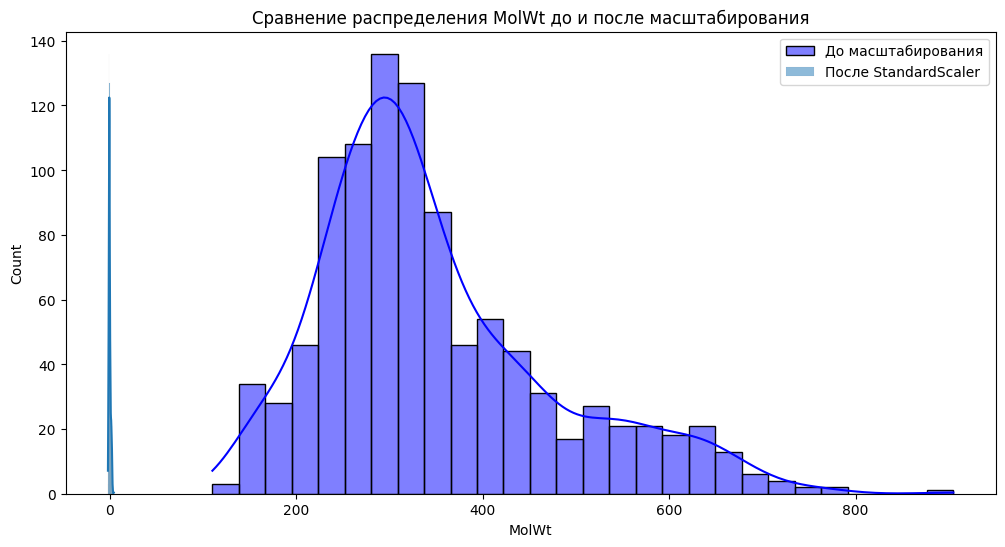

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(df['MolWt'], kde=True, label='До масштабирования', color='blue')

# После масштабирования
scaler = StandardScaler()
scaled_MolWt = scaler.fit_transform(df[['MolWt']])
sns.histplot(scaled_MolWt, kde=True, label='После StandardScaler', color='red', alpha=0.5)
plt.legend()
plt.title("Сравнение распределения MolWt до и после масштабирования")
plt.show()

In [ ]:
# 1. Заполнение пропусков медианой
df_clean = df.copy()
df_clean.fillna(df_clean.median(), inplace=True)

# 2. Обнаружение и удаление выбросов с помощью IsolationForest
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Создаем и обучаем модель IsolationForest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df_clean[numeric_cols])

# Создаем новый DataFrame без выбросов
df_no_outliers = df_clean[outliers == 1].copy()

# 3. Разделение на признаки и целевую переменную
X = df_no_outliers.drop(["IC50, mM", "CC50, mM", "SI"], axis=1)
y = df_no_outliers["IC50, mM"]

# 4. Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Вывод информации
print(f"Исходный размер данных: {len(df)} записей")
print(f"После очистки: {len(df_no_outliers)} записей")
print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

Исходный размер данных: 903 записей
После очистки: 857 записей
Обучающая выборка: 685 samples
Тестовая выборка: 172 samples
